<a href="https://colab.research.google.com/github/kojikoji19780303/Cry_baby/blob/master/DAY12_%E4%BF%A1%E7%94%A8%E6%83%85%E5%A0%B1%E3%81%AE%E5%88%86%E6%9E%90_%E8%AA%B2%E9%A1%8C%E6%8F%90%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

ホームクレジットは、前向きで安全な借入体験を提供することにより、銀行口座を持たない人々の金融包摂を拡大するよう努めています。このサービスの行き届いていない人々が前向きなローン経験を持っていることを確認するために、Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測します。

Home Creditは現在、これらの予測を行うためにさまざまな統計的手法と機械学習手法を使用していますが、データの可能性を最大限に引き出すためにKagglersに挑戦しています。そうすることで、返済可能なクライアントが拒否されないようにし、クライアントが成功するための元本、満期、および返済カレンダーを使用してローンが提供されるようにします。

企業は貸し倒れが減り、利益が残ります

データセットの準備
分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。

In [7]:
# ライブラリのインポート
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [14]:
ls

 15CreditProblem.ipynb
 2次元配列と勾配問題.ipynb
 application_test.csv
 application_train.csv
 bike.tsv
 Boston.csv
 boston.pkl
 boston_scx.pkl
 boston_scy.pkl
 bureau_balance.csv
 bureau.csv
 cinema.csv
 cinema.pkl
 credit_card_balance.csv
 DAY10_アヤメの分析_課題提出.ipynb
 DAY11_住宅情報の分析_課題提出.ipynb
 DAY12_信用情報の分析_課題提出.ipynb
 Day1_Kamiori.ipynb
 DAY2_SORORI.ipynb
 Day3_FUJI.ipynb
 DAY4_kurimanju_fukushu.ipynb
 Day5_komugi_chess_fukushu.ipynb
 DAY5_KOMUGI_to_CHES.ipynb
 DAY5_小麦とチェス問題＿課題提出.ipynb
 DAY6_ダミーデータ問題_課題提出.ipynb
 DAY7_行列積の実装_課題提出.ipynb
 DAY8_二次元配列と勾配問題_課題提出.ipynb
 DAY9_富士山下山問題_課題提出.ipynb
 Day４_Kuri_manju_yoshu.ipynb
 DSB_自然言語.ipynb
 ex1.csv
 ex2.csv
 ex3.csv
 ex4.csv
'example_answer_week2_session2 (1).ipynb'
'example_answer_week2_session2 (2).ipynb'
 example_answer_week2_session2.ipynb
'example_answer_week3_session1 (1).ipynb'
 example_answer_week3_session1.ipynb
'example_answer_week3_work1 (1).ipynb'
'example_answer_week3_work1 (2).ipynb'
 example_answer_week3_work1.ipynb
'example_answer_week

In [16]:
# ファイルの読み込み
df = pd.read_csv("application_train.csv")

【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

In [57]:
#　データの数値やオブジェクトなど
df.head(2)
# 目的変数はTARGET 1がデフォルトした人
# 多くは数値データ

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 250491行 122列
df.shape

(250491, 122)

In [22]:
# データフレーム型 float 103 int 3 object 16
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250491 entries, 0 to 250490
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 233.2+ MB


In [23]:
# 目的変数の分布が偏っている
df["TARGET"].value_counts()

0    230168
1     20323
Name: TARGET, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0b76107950>,
 [Text(-0.2773483242393136, -1.064461322473318, ''),
  Text(0.27734829932379845, 1.0644613289651235, '')],
 [Text(-0.15128090413053466, -0.5806152668036278, '91.9%'),
  Text(0.1512808905402537, 0.5806152703446128, '8.1%')])

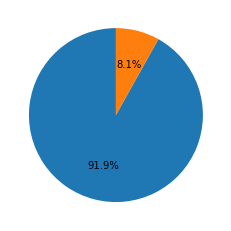

In [27]:
label_counts = df['TARGET'].value_counts()
plt.pie(label_counts,startangle=90, autopct="%1.1f%%")

(array([230168.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  20323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

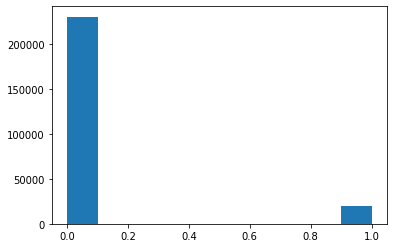

In [32]:
# 目的変数の幅を観る
plt.hist(df["TARGET"])

In [33]:
# 統計情報を取る
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,250491.000000,250491.000000,250491.000000,2.504910e+05,2.504910e+05,250479.000000,2.502760e+05,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,85029.000000,250490.000000,250490.000000,250490.000000,250490.00000,250490.000000,250490.000000,250488.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,109280.000000,2.499520e+05,200723.000000,123122.000000,103676.000000,128147.000000,83756.000000,75307.000000,116792.000000,124164.000000,125652.000000,...,124164.000000,125652.000000,80375.000000,101514.000000,79102.000000,124590.000000,76458.000000,112096.000000,129421.000000,249668.000000,249668.000000,249668.000000,249668.000000,250489.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,250490.000000,216599.000000,216599.000000,216599.000000,216599.000000,216599.000000,216599.000000
mean,245177.373989,0.081133,0.417105,1.688586e+05,5.983023e+05,27106.834124,5.376807e+05,0.020856,-16038.585049,63886.906200,-4988.409845,-2993.093341,12.069247,0.999996,0.819689,0.199014,0.99816,0.281209,0.057280,2.153125,2.052569,2.031546,12.062382,0.015174,0.050856,0.040568,0.078251,0.230508,0.179492,0.501941,5.141237e-01,0.510796,0.117283,0.088452,0.977682,0.752377,0.044648,0.078598,0.149732,0.226006,...,0.149206,0.225626,0.231361,0.067050,0.101804,0.108425,0.008712,0.028173,0.102383,1.425553,0.143739,1.408543,0.100225,-963.637988,0.000040,0.710767,0.000084,0.015126,0.088119,0.000212,0.081189,0.003896,0.000024,0.003852,0.000008,0.003449,0.002914,0.001170,0.009705,0.000252,0.007877,0.000575,0.000475,0.000331,0.006524,0.007059,0.034677,0.267300,0.266936,1.904824
std,83744.768737,0.273039,0.722252,2.584071e+05,4.016530e+05,14496.064448,3.686696e+05,0.013821,4369.950003,141337.344979,3524.444670,1510.688846,11.957463,0.001998,0.384447,0.399259,0.04286,0.449590,0.232377,0.911071,0.509019,0.502693,3.265087,0.122246,0.219705,0.197289,0.268566,0.421159,0.383765,0.211109,1.912744e-01,0.194675,0.108183,0.082370,0.059538,0.113395,0.076264,0.134119,0.099897,0.144527,...,0.100226,0.144957,0.161753,0.081804,0.093719,0.112234,0.048351,0.069899,0.107550,2.422112,0.448266,2.400815,0.362938,826.340568,0.006318,0.453407,0.009156,0.122056,0.283469,0.014544,0.273125,0.062299,0.004894,0.061949,0.002826,0.058629,0.053906,0

In [34]:
# 欠損値
df.isnull().sum(axis = 0)
# 結構多い

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     33892
AMT_REQ_CREDIT_BUREAU_WEEK    33892
AMT_REQ_CREDIT_BUREAU_MON     33892
AMT_REQ_CREDIT_BUREAU_QRT     33892
AMT_REQ_CREDIT_BUREAU_YEAR    33892
Length: 122, dtype: int64

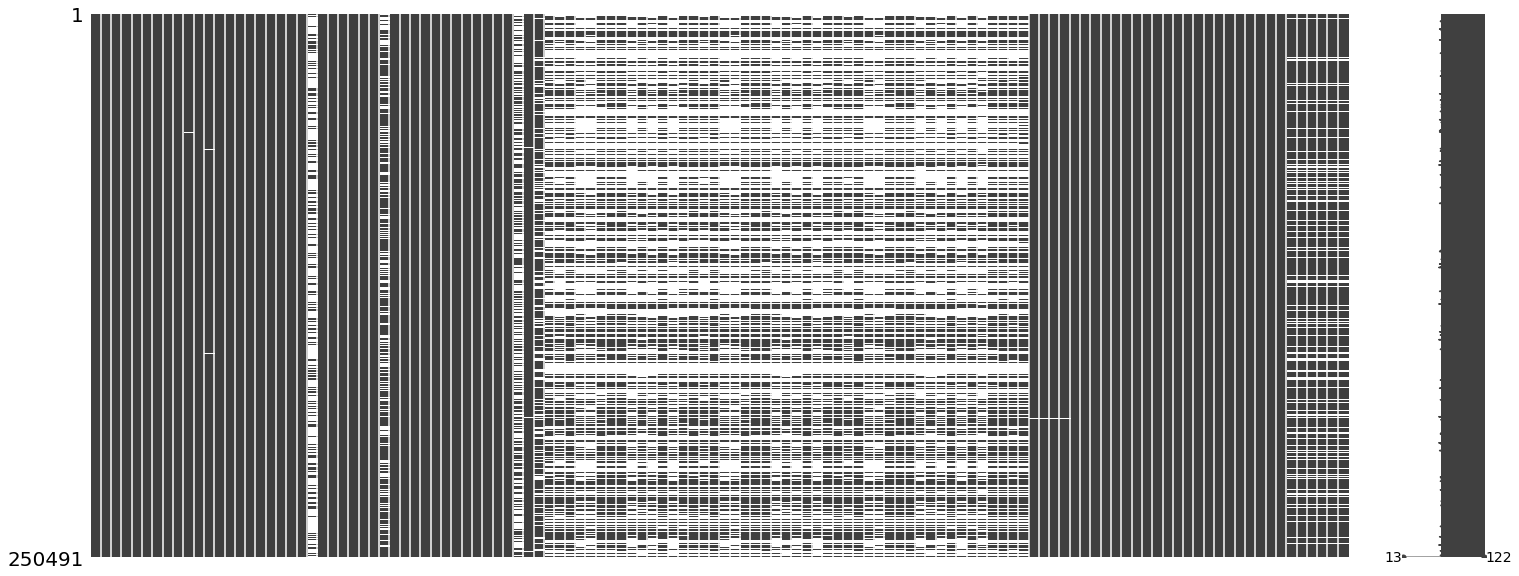

In [35]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

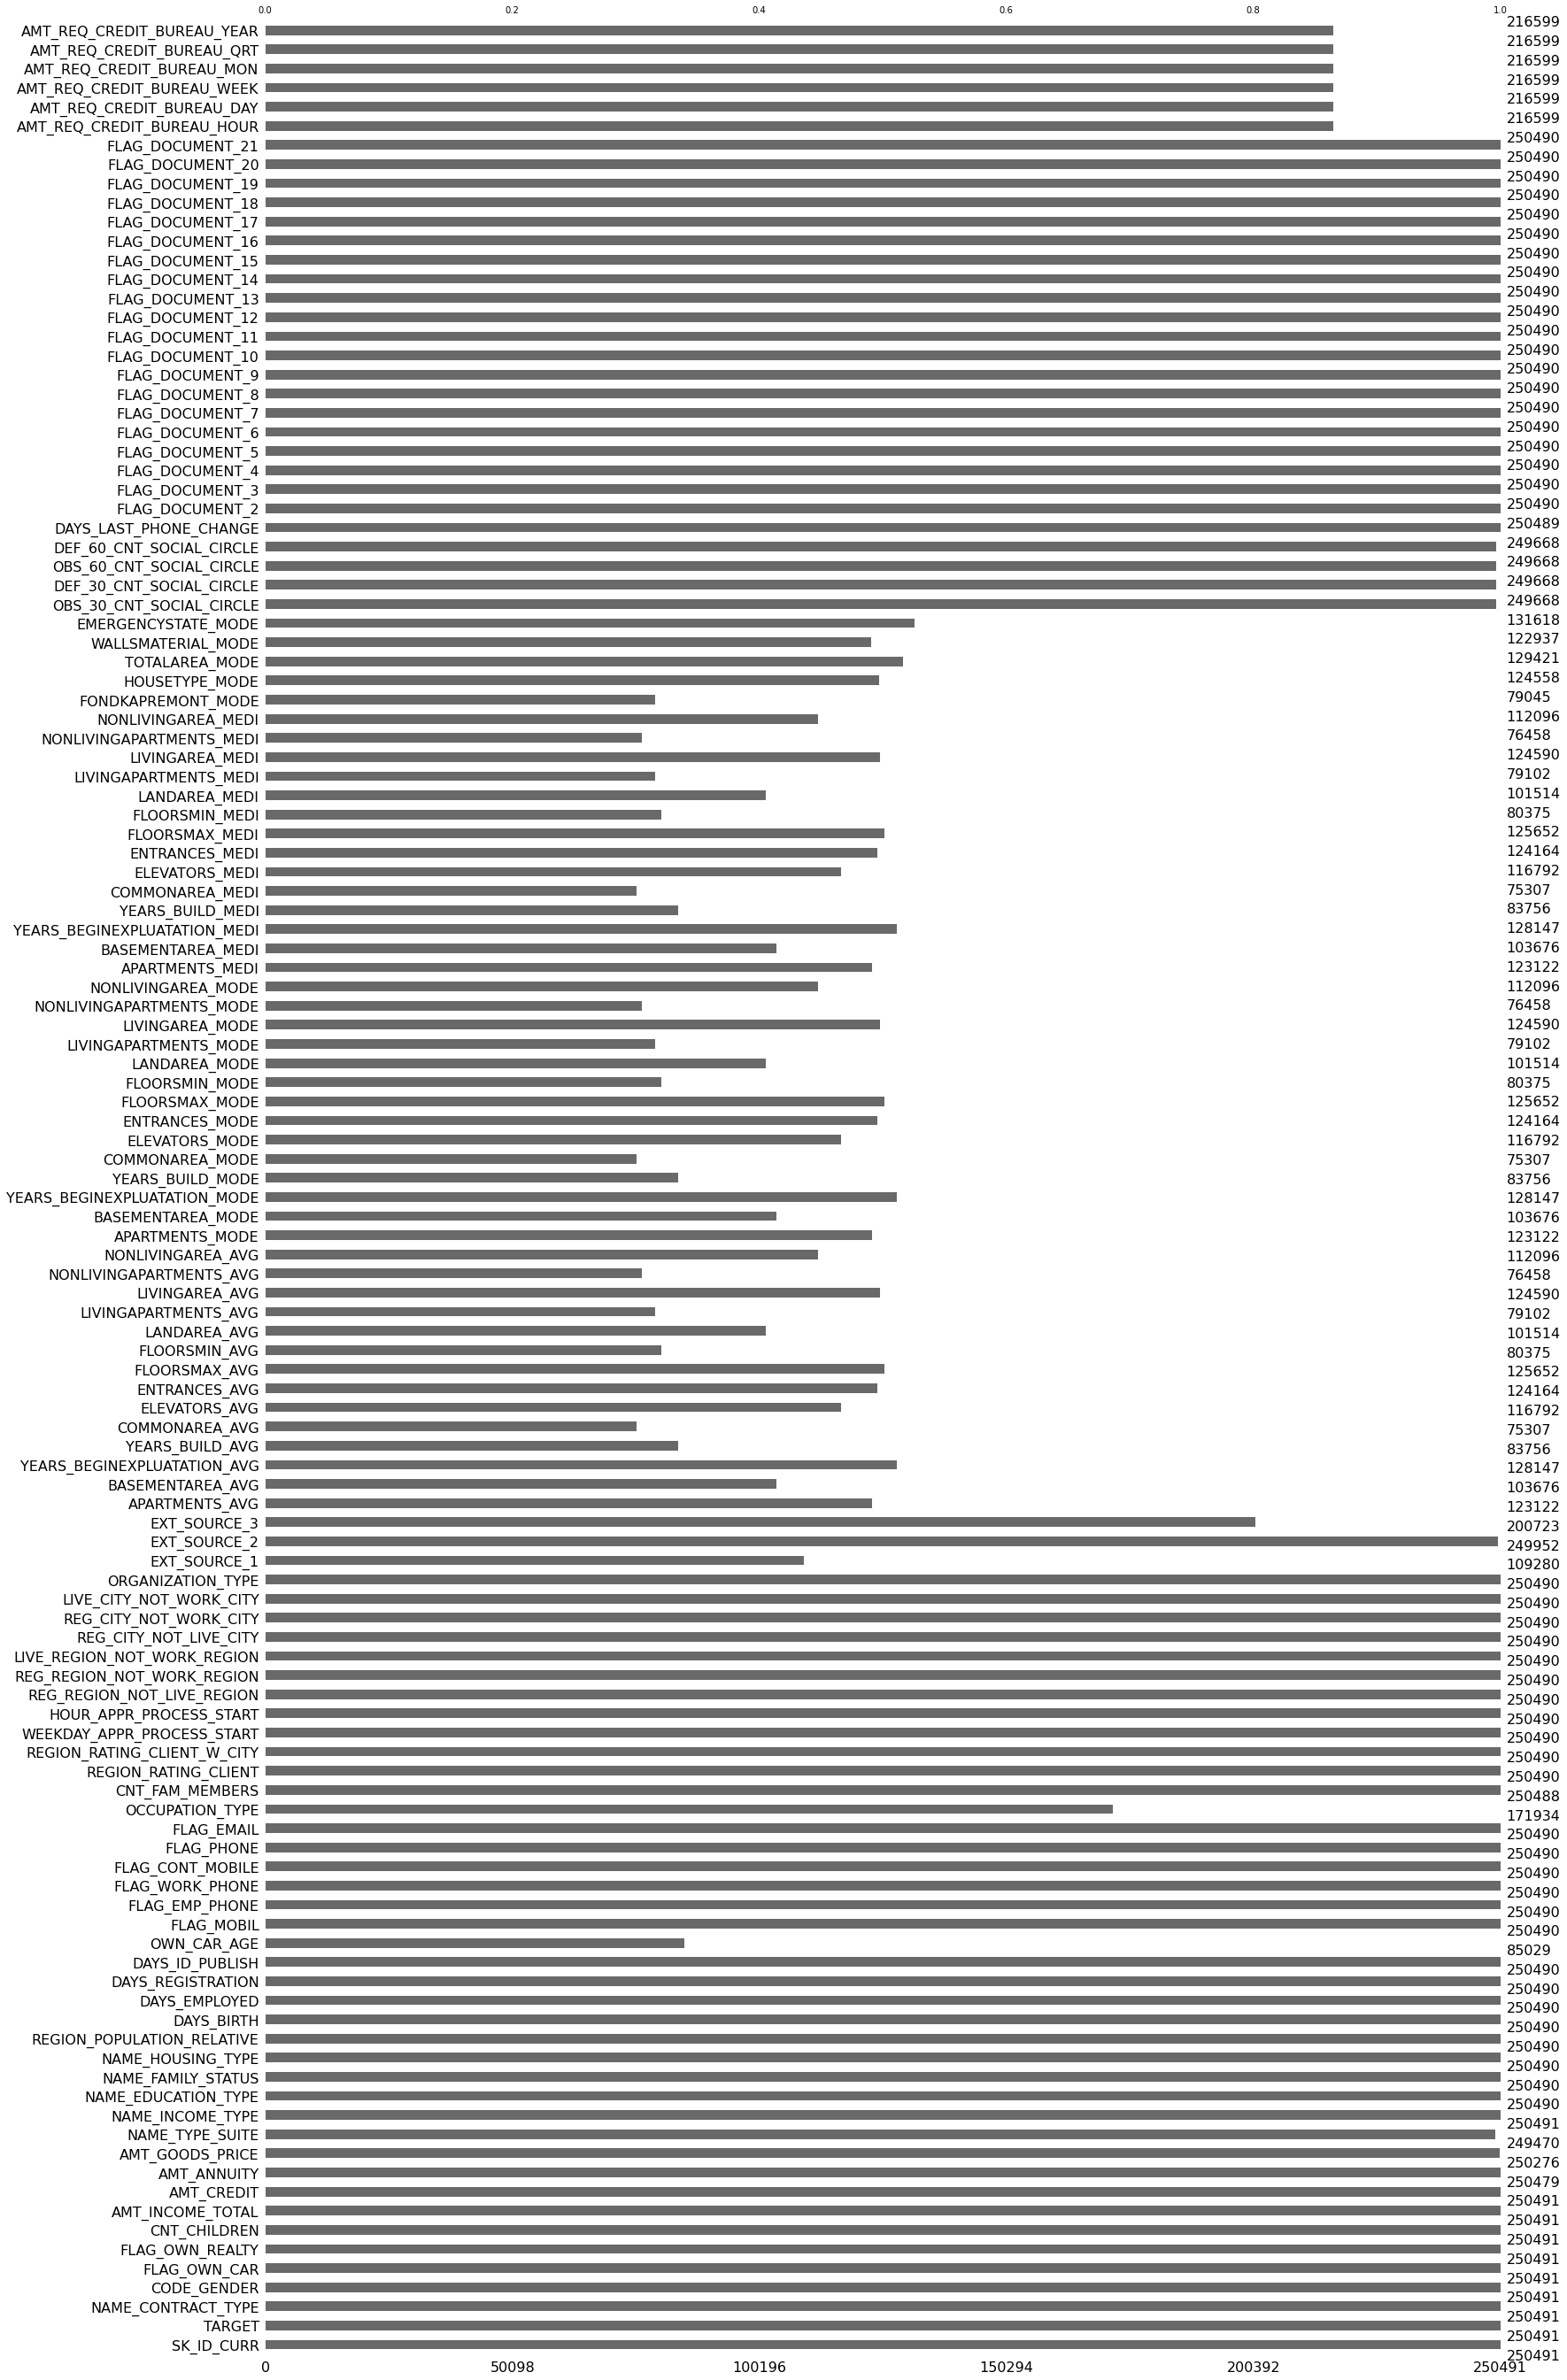

In [36]:
# 特徴量ごとの欠損していない割合を見る
msno.bar(df)

【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 5個以上 作成してください。

(array([   0.,   99.,  434., 1233., 2496., 2827., 3249., 2354., 2227.,
         237., 1317., 1406.,  411.,  670.,  234.,  327.,  115.,  212.,
           9.,   73.]),
 array([  1000.,  20950.,  40900.,  60850.,  80800., 100750., 120700.,
        140650., 160600., 180550., 200500., 220450., 240400., 260350.,
        280300., 300250., 320200., 340150., 360100., 380050., 400000.]),
 <a list of 20 Patch objects>)

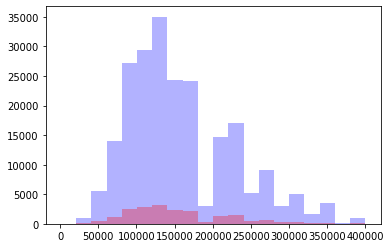

In [44]:
# 年収が高い人の方が返済してそう。 上の仮説を検証するために、返済している人と返済してない人で年収分布をみて見る。
plt.hist(df["AMT_INCOME_TOTAL"][df["TARGET"]==0],bins=20, alpha = 0.3 ,color="b" ,range=(1000,400000))
plt.hist(df["AMT_INCOME_TOTAL"][df["TARGET"]==1],bins=20, alpha = 0.3 ,color="r" ,range=(1000,400000))
# 年収と返済能力の（0,1）にはそれほど相関がない

In [46]:
# 返済が滞る人はローンを頻繁に組んでいそう。 この仮説を検証するため、ターゲットラベルごとに、OBS_30_CNT_SOCIAL_CIRCLEとDEF_30_CNT_SOCIAL_CIRCLEの統計量を確認する。

df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==0].describe()

count    229374.000000
mean          1.418086
std           2.424329
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [48]:
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==1].describe()
# 比較しても特徴はみられない

count    20294.000000
mean         1.509954
std          2.395353
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         25.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

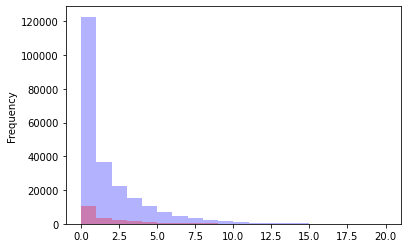

In [49]:
# ターゲットラベルが0と１で1ヶ月間のユーザーの最大貸し出し（ローン）回数は変わるが、平均値、標準偏差に大差がないことからも 分布がロングテールであることが予想される。念のため、分布を確認する。
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b" ,range=(0,20))
df["OBS_30_CNT_SOCIAL_CIRCLE"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r",range=(0,20))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


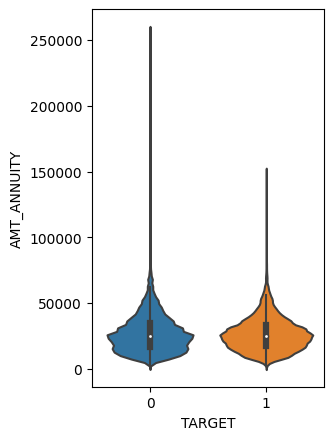

In [50]:
# ローン返済額が多い人は家計が圧迫され、返済が滞ると考えられる。
# この仮説を検証するため、ターゲットラベルごとに、バイオリンプロットで分布を確認する。

import seaborn as sns

size=(3,5)
plt.figure(figsize=size,dpi=100)
sns.violinplot("TARGET","AMT_ANNUITY" , data = df)

# ラベルごとでローン返済額の分布は変わらず。ターゲットラベル「0」の人の方がローン返済額の最大値が多く、ローン額150000ドル以上はターゲットラベル「１」の中にはいない。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


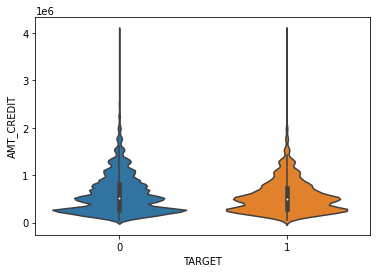

In [51]:
# ローン返済額とローン返済額の総計には相関がある。月々の支払いが高額な人は借りている合計金額も高額であるかもしれない。
sns.violinplot("TARGET","AMT_CREDIT" , data = df)

In [52]:
df[["AMT_ANNUITY","AMT_CREDIT"]].corr()

,AMT_ANNUITY,AMT_CREDIT
AMT_ANNUITY,1.000000,0.769893
AMT_CREDIT,0.769893,1.000000


Text(0, 0.5, 'AMT_ANNUITY')

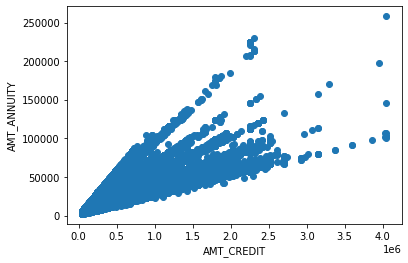

In [53]:
plt.scatter(df["AMT_CREDIT"], df["AMT_ANNUITY"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')

上の散布図から、ある金額（AMT_CREDIT）を借りている場合にそれに対応する月額返済額(AMT_ANNUITY)の 上限と下限が決まっていることが確認できる。　その制約条件範囲外ではデータは存在しないことになり 、上で算出した相関係数0.77という値から相関の有無を判断することはできないと考える。

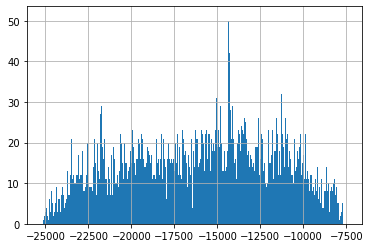

In [59]:
# 外れ値の確認
df["DAYS_BIRTH"].hist(bins = df["DAYS_BIRTH"].nunique())

In [62]:
# 全ユーザーのうち、50%以上が欠損であるカラムをカウントする。
missing_data = pd.DataFrame(df.isnull().sum()/len(df))
missing_data

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.135302
AMT_REQ_CREDIT_BUREAU_WEEK,0.135302
AMT_REQ_CREDIT_BUREAU_MON,0.135302
AMT_REQ_CREDIT_BUREAU_QRT,0.135302


In [63]:
missing_50 = missing_data[missing_data.iloc[:,0]>=0.5]
missing_50

,0
OWN_CAR_AGE,0.660551
EXT_SOURCE_1,0.563737
APARTMENTS_AVG,0.508477
BASEMENTAREA_AVG,0.586109
YEARS_BUILD_AVG,0.665633
COMMONAREA_AVG,0.699362
ELEVATORS_AVG,0.533748
ENTRANCES_AVG,0.504318
FLOORSMIN_AVG,0.679130
LANDAREA_AVG,0.594740


In [64]:
missing_50.shape
# ※41個の特徴量が50%以上nanなので、一つずつ精査する必要がある。 

(41, 1)